Error relativo N=20: 3.43850e-02
Error relativo N=40: 1.18019e-02

Orden de convergencia estimado: 1.54


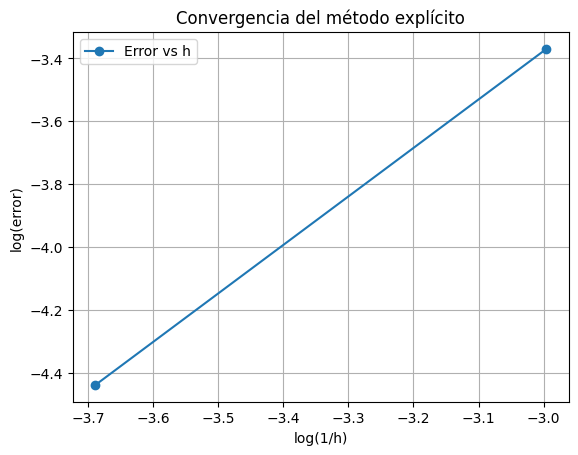

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

def solve_heat_equation(N, dt, Nt):
    L = 1.0
    alpha = 1.0
    dx = dy = L / N
    r = alpha * dt / dx**2

    x = np.linspace(0, L, N+1)
    y = np.linspace(0, L, N+1)
    X, Y = np.meshgrid(x, y, indexing='ij')
    T = np.sin(np.pi * X) * np.sin(np.pi * Y)

    for n in range(Nt):
        T_new = T.copy()
        for i in range(1, N):
            for j in range(1, N):
                T_new[i, j] = T[i, j] + r * (
                    T[i+1, j] - 2*T[i, j] + T[i-1, j] +
                    T[i, j+1] - 2*T[i, j] + T[i, j-1]
                )

        # Condiciones de frontera
        T_new[0, :] = 0
        T_new[N, :] = 0
        T_new[:, 0] = T_new[:, 1]        # y=0 (aislante)
        T_new[:, N] = T_new[:, N-1]      # y=L (aislante)
        T = T_new.copy()

    return X, Y, T

# ===============================
# PARTE PRINCIPAL: Análisis de convergencia
# ===============================

resolutions = [20, 40, 80]
solutions = []

for N in resolutions:
    dx = 1 / N
    dt = 0.25 * dx**2  # r = 0.25 para estabilidad
    Nt = int(0.1 / dt)
    X, Y, T = solve_heat_equation(N, dt, Nt)
    solutions.append((X, Y, T))

# Usar la más fina como referencia
X_ref, Y_ref, T_ref = solutions[-1]

# Calcular errores relativos interpolando a la malla más fina
errors = []

for i, (Xc, Yc, Tc) in enumerate(solutions[:-1]):
    interp_func = RegularGridInterpolator((Xc[:, 0], Yc[0, :]), Tc, method='linear')
    points = np.array([X_ref.flatten(), Y_ref.flatten()]).T
    Tc_interp_flat = interp_func(points)
    Tc_interp = Tc_interp_flat.reshape(X_ref.shape)

    error = np.linalg.norm(Tc_interp - T_ref) / np.linalg.norm(T_ref)
    errors.append(error)
    print(f'Error relativo N={resolutions[i]}: {error:.5e}')

# Calcular orden de convergencia estimado
h = np.array([1/r for r in resolutions[:-1]])
log_h = np.log(h)
log_e = np.log(errors)

p = (log_e[1] - log_e[0]) / (log_h[1] - log_h[0])
print(f"\nOrden de convergencia estimado: {p:.2f}")

# ===============================
# Gráfico opcional de convergencia
# ===============================
plt.figure()
plt.plot(log_h, log_e, 'o-', label='Error vs h')
plt.xlabel('log(1/h)')
plt.ylabel('log(error)')
plt.title('Convergencia del método explícito')
plt.grid(True)
plt.legend()
plt.show()


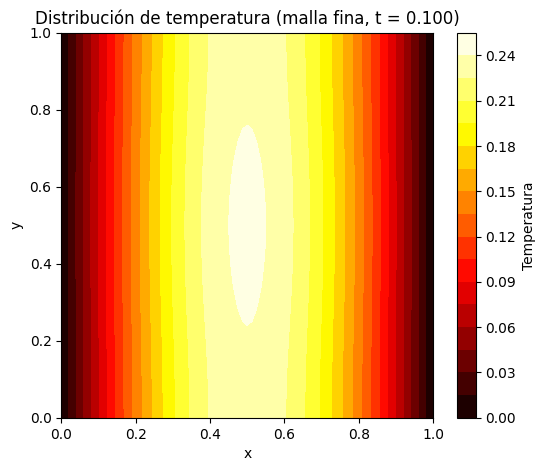

In [3]:
# ===============================
# Visualización final de la solución más fina
# ===============================
plt.figure(figsize=(6,5))
plt.contourf(X_ref, Y_ref, T_ref, 20, cmap='hot')
plt.colorbar(label='Temperatura')
plt.title('Distribución de temperatura (malla fina, t = {:.3f})'.format(Nt*dt))
plt.xlabel('x')
plt.ylabel('y')
plt.show()
